In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create



# Read in the data

df= pd.read_csv(r'C:\Users\shali\OneDrive\Desktop\ecomm data analysis.csv')

In [2]:
# Let's look at the data

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
df.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
1048570,671875,33287,5,6,15,30.0,69,12,1,15,canned goods,soup broth bouillon
1048571,671875,33287,5,6,15,30.0,91,13,1,16,dairy eggs,soy lactosefree
1048572,671875,33287,5,6,15,30.0,61,14,1,19,snacks,cookies cakes
1048573,671875,33287,5,6,15,30.0,61,15,1,19,snacks,cookies cakes
1048574,419699,24832,4,0,10,2.0,84,1,1,16,dairy eggs,milk


### Data Cleaning and Manipulation

In [4]:
# Finding missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

order_id-0.0%
user_id-0.0%
order_number-0.0%
order_dow-0.0%
order_hour_of_day-0.0%
days_since_prior_order-0.061722814295591635%
product_id-0.0%
add_to_cart_order-0.0%
reordered-0.0%
department_id-0.0%
department-0.0%
product_name-0.0%


**From the summary, it appears that the 'days_since_prior_order' column has some missing values. We might need to decide how to handle these missing values and for that we will fill the missing values with 0**

In [5]:
new_df = df.fillna(0)
new_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,671875,33287,5,6,15,30.0,69,12,1,15,canned goods,soup broth bouillon
1048571,671875,33287,5,6,15,30.0,91,13,1,16,dairy eggs,soy lactosefree
1048572,671875,33287,5,6,15,30.0,61,14,1,19,snacks,cookies cakes
1048573,671875,33287,5,6,15,30.0,61,15,1,19,snacks,cookies cakes


In [6]:
# Data type for our columns

new_df.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
department_id               int64
department                 object
product_name               object
dtype: object

In [7]:
new_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables


In [8]:
# changing the datatype
new_df['days_since_prior_order'] = new_df['days_since_prior_order'].astype('int64')

In [9]:
new_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,671875,33287,5,6,15,30,69,12,1,15,canned goods,soup broth bouillon
1048571,671875,33287,5,6,15,30,91,13,1,16,dairy eggs,soy lactosefree
1048572,671875,33287,5,6,15,30,61,14,1,19,snacks,cookies cakes
1048573,671875,33287,5,6,15,30,61,15,1,19,snacks,cookies cakes


### Data Visualization using EDA method

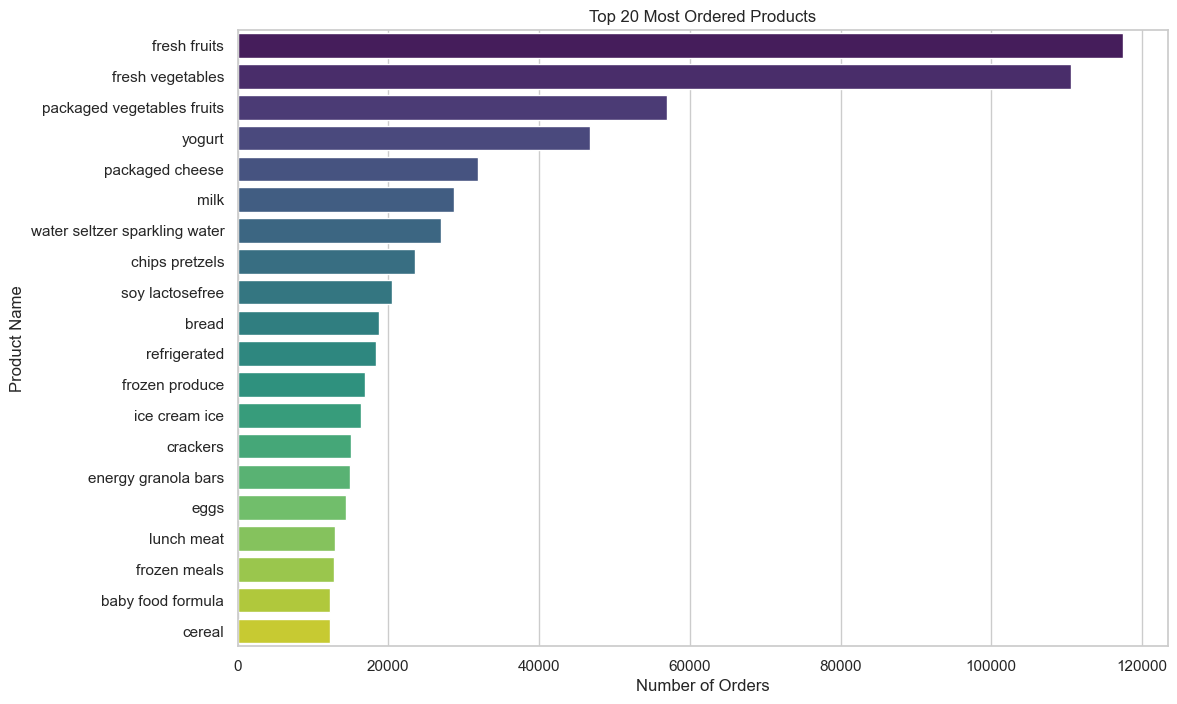

In [12]:
# Count the occurrences of each product name
product_counts = new_df['product_name'].value_counts().head(20)  # Limiting to top 20 for better visualization

# Plotting
plt.figure(figsize=(12, 8), facecolor='white')
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

**The most ordered product category is fresh fruits and vegetables, followed by the other most ordered ones as visualized above. The high demand for fresh fruits and vegetables could be due to factors such as their nutritional value, versatility in meal preparation, and consumer preferences for healthy eating habits. Additionally, their perishable nature may necessitate more frequent purchases compared to other product categories, contributing to their prominence in order volume.**

C:\Users\shali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


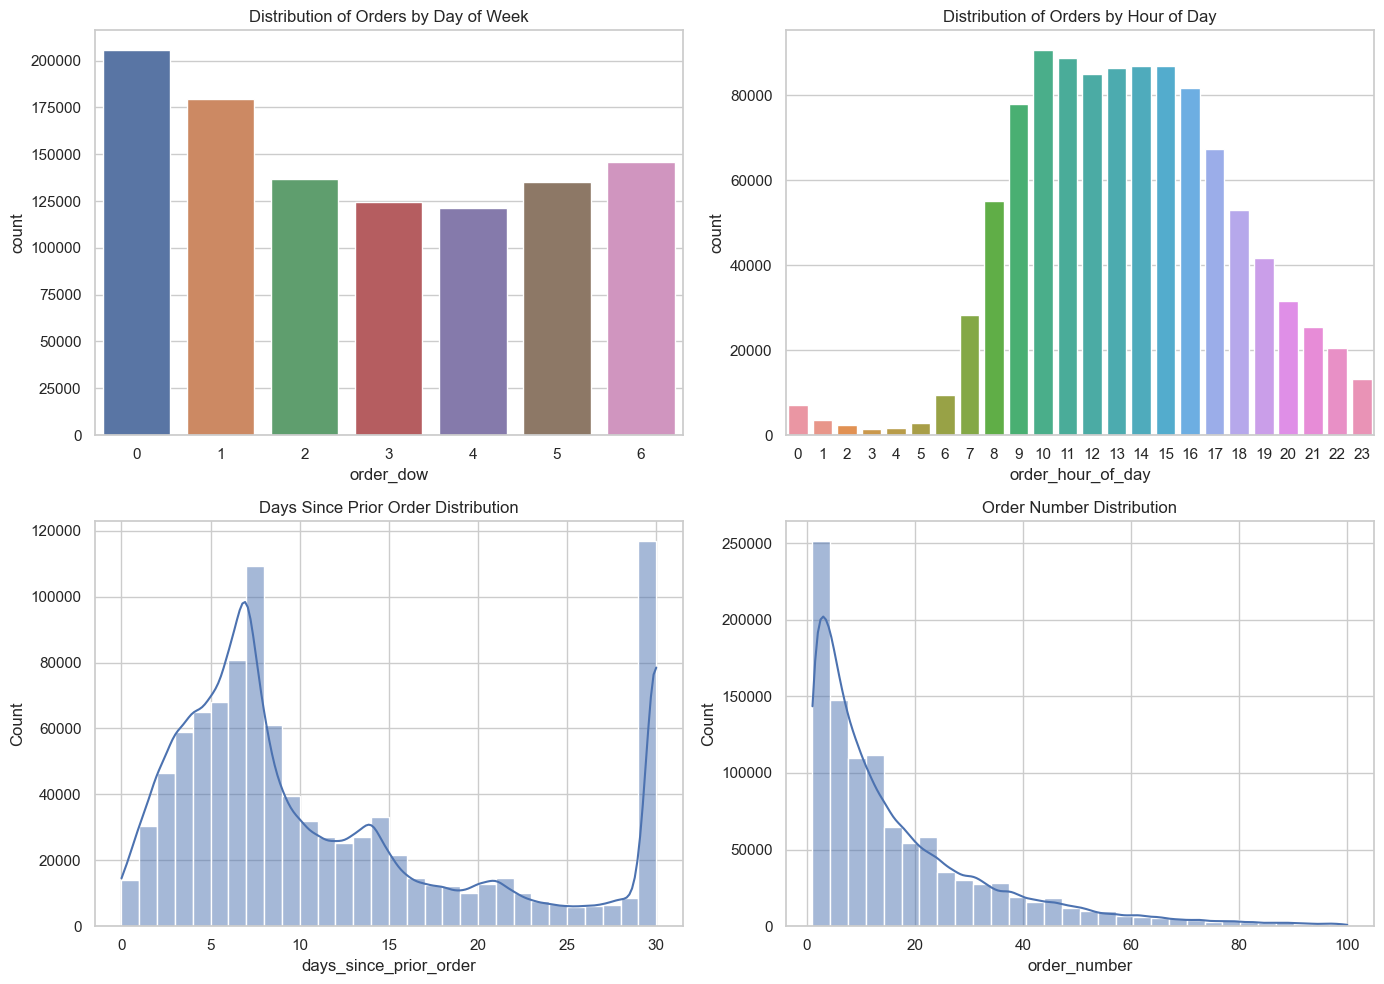

In [11]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot distribution of 'order_dow' (day of week)
sns.countplot(x='order_dow', data=new_df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Orders by Day of Week')

# Plot distribution of 'order_hour_of_day'
sns.countplot(x='order_hour_of_day', data=new_df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Orders by Hour of Day')

# Plot distribution of 'days_since_prior_order'
sns.histplot(df['days_since_prior_order'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Days Since Prior Order Distribution')

# Plot distribution of 'order_number'
sns.histplot(df['order_number'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Order Number Distribution')

plt.tight_layout()
plt.show()

**Here 0= Sunday and 6=Saturday in day of week column**

**Following are the insights from the visualizations:**

1. **Distribution of Orders by Day of Week**:Orders are fairly evenly distributed throughout the week, with slight variations. There might be a slight increase in orders on certain days, possibly due to weekly shopping habits, promotions, special deals, weekly planning, and restocking could influence which days people prefer to order.

2. **Distribution of Orders by Hour of Day**:Most orders are placed during the daytime, peaking around midday. The number of orders decreases significantly during the late evening and early morning hours. This pattern suggests that most shopping is done during typical waking hours, possibly during breaks or just after work hours.People tend to shop during their free time, which often coincides with midday breaks or post-work hours.

3. **Days Since Prior Order Distribution**:A large number of orders are placed within a short period since the last order, indicating frequent, regular purchasing. There's also a noticeable peak at around 30 days, which might suggest monthly restocking or subscription-based ordering behaviors.The peaks at shorter intervals and around 30 days could be driven by the natural restocking needs of households or by subscription models that encourage monthly orders.

4. **Order Number Distribution**:The distribution shows that a significant number of customers place only a few orders, with the frequency decreasing as the number of orders increases. This could indicate that while the platform has many one-time or infrequent users, there are fewer but significant loyal customers who place many orders.The trend where fewer people place many orders could be typical of many e-commerce platforms where gaining loyal, repeat customers is more challenging than attracting one-time buyers.

### Recommendations

**Strategies to implement in order to increase its revenue but also enhance customer satisfaction and loyalty for long-term success in the competitive retail market are as follows:**

1. **Focus on High-Demand Products**
   - **Stock Optimization:** Increase the stock levels of the top-selling products such as fresh fruits and vegetables, especially on weekends when their demand peaks. This will help in meeting customer demand and reducing the chances of stockouts.
   - **Promotions and Discounts:** Consider offering promotions or discounts on these high-demand products during peak times to drive higher sales volumes.

2. **Weekend Sales Strategy**
   - **Targeted Marketing:** Since products like yogurt, baking ingredients, and soy lactose-free items are popular on weekends, create targeted marketing campaigns for these days. This could include special weekend offers or bundled deals.
   - **Extended Hours:** If feasible, consider extending store hours on weekends to accommodate the increased traffic, ensuring that customers have ample time to shop.

3. **Leverage Data for Inventory Management**
   - **Predictive Analytics:** Utilize data analytics to predict future sales trends based on historical data. This can help in optimizing inventory levels, reducing waste, and ensuring that popular products are always available.
   - **Dynamic Pricing:** Implement dynamic pricing strategies for perishable goods to minimize losses due to spoilage. Prices can be adjusted based on demand and remaining shelf life.

4. **Enhance Customer Experience**
   - **Personalized Recommendations:** Use customer purchase history to offer personalized product recommendations through the store’s app or website. This can enhance the shopping experience and increase customer satisfaction.
   - **Loyalty Programs:** Develop a loyalty program that rewards frequent shoppers with points that can be redeemed for discounts or special offers. This can help in retaining existing customers and attracting new ones.

5. **Diversify Product Offerings**
   - **New Product Introductions:** Regularly introduce new products in the categories that are already popular among customers. This can keep the product offerings fresh and engaging for regular customers.
   - **Health and Wellness Products:** Given the popularity of products like soy lactose-free and yogurt, there might be a growing trend towards health-conscious products. Expanding this category could attract a broader customer base.

6. **Optimize Supply Chain**
   - **Vendor Relationships:** Strengthen relationships with suppliers to ensure a reliable supply of high-demand products. Consider multiple suppliers for critical stock items to mitigate risks.
   - **Efficient Logistics:** Improve logistics and delivery processes to ensure that products are replenished faster, especially before weekends.